# Training a basic model to see results

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
X = pd.read_csv('./intermediate_results/X.csv')

In [5]:
y = X['worldwide_gross'] # This one will be the target

In [8]:
X = X.drop('Unnamed: 0', axis=1).drop('worldwide_gross',axis=1) # Selecting the features

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4,random_state= 0) # Spliting data for the model

In [11]:
from sklearn.linear_model import Lasso
model = Lasso() #First simple model

In [12]:
model.fit(X_train,y_train)

/home/gersonp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.778374483375067e+18, tolerance: 6694006510365073.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
predicted = model.predict(X_test)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

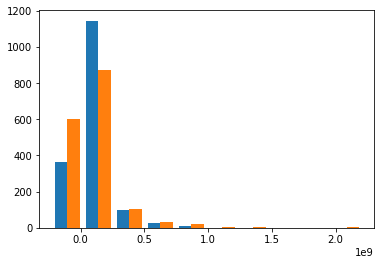

In [27]:
plt.hist([predicted,y_test]); # the relation of the predicted target and its real value is a little far

In [16]:
model.score(X_test, y_test) # The model got a certainty of th 57% which is not bad but not good enough

0.5765168418104365

In [17]:
residuals = y_test - predicted # the difference between the predicted result and the real value

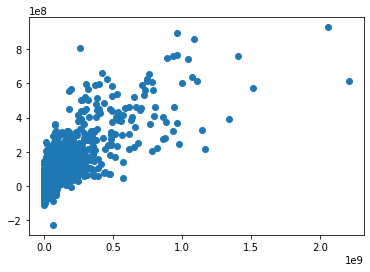

In [28]:
plt.scatter(y_test,predicted) # if the score were 100% , this graphic would be a perfect 45 dregrees line

In [19]:
ap_residuals = np.abs(residuals)/y_test

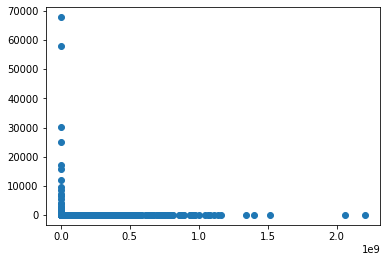

In [20]:
plt.scatter(y_test,ap_residuals) # this grapich represents the amount of error related to the real values 

In [21]:
lap_residuals = np.log(ap_residuals)

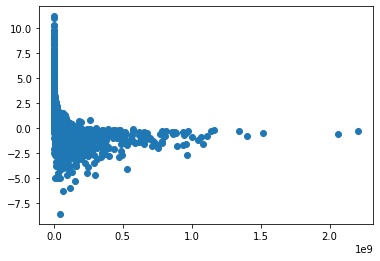

In [22]:
plt.scatter(y_test,lap_residuals) # logarithm of the error related to the real values

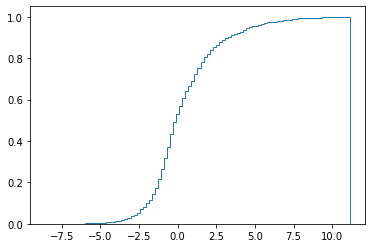

In [29]:
plt.hist(lap_residuals, bins=100,density=1,histtype='step',cumulative = True); 
# a step function making a relation between the logarith of the error as an accumulative increase,
# to the behavior of the efficiency of the model 

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

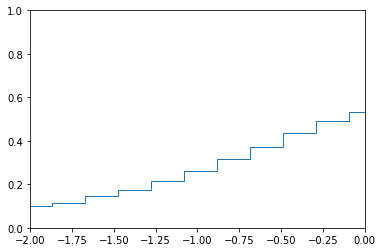

In [24]:
plt.hist(lap_residuals, bins=100,density=1,histtype='step',cumulative = True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))
# here it canbe seen that
# 13,53% of the predictions had an error of one percent
# 22,31% of the predictions had an error less that 10 %
# 60.65% of the predictions had an error les than 100%